# Bend Morphologies to stay inside Mesh

This jupyter notebook explains how to setup a network where the axons and dendrites bend to stay within the mesh boundaries.

In [1]:
import os
from snudda.place import create_cube_mesh

network_path = os.path.join("networks", "bending_example")
mesh_file = os.path.join(network_path, "mesh", "cube_volume.obj")

create_cube_mesh(mesh_file, [200e-6,200e-6, 200e-6], 400e-6, "Cube for bending example")

When adding the neurons with ```add_neurons```, we pass ```stay_inside=True``` for the neurons to be inside the mesh.

In [2]:
from snudda import SnuddaInit

si = SnuddaInit(network_path=network_path, random_seed=123)

si.define_structure(struct_name="Striatum", struct_mesh=mesh_file, d_min=15e-6, mesh_bin_width=50e-6)

neuron_dir = os.path.join("$DATA","neurons","striatum","dspn")  # Use this instead for real morphologies

# stay_inside=True means the axons and dendrites should be inside volume
si.add_neurons(name="dSPN", num_neurons=100, volume_id="Striatum",
               neuron_dir=neuron_dir, stay_inside=True)

si.write_json()

Adding neurons: dSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/dspn
Writing networks/bending_example/network-config.json


In [3]:
network_file = os.path.join(network_path, "network-neuron-positions.hdf5")
original_network_file = os.path.join(network_path, "original-network-neuron-positions.hdf5")
bend_network_file = os.path.join(network_path, "bend-network-neuron-positions.hdf5")

In [4]:
from snudda import SnuddaPlace
# morphologies_stay_inside -- ignores the stay_inside flag from above (so we get basic version)
sp = SnuddaPlace(network_path=network_path, verbose=False, morphologies_stay_inside=False)
sp.place()

Reading SNUDDA_DATA=None from networks/bending_example/network-config.json
No n_putative_points and putative_density, setting n_putative_points = 23853
(this must be larger than the number of neurons you want to place)
Generating 23853 points for networks/bending_example/mesh/cube_volume.obj
Filtering, keeping inside points: 6993 / 8930
neuron_name = 'dSPN_0', num = np.int64(25), neuron_path = '$SNUDDA_DATA/neurons/striatum/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20190508'
neuron_name = 'dSPN_1', num = np.int64(25), neuron_path = '$SNUDDA_DATA/neurons/striatum/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20190521'
neuron_name = 'dSPN_2', num = np.int64(25), neuron_path = '$SNUDDA_DATA/neurons/striatum/dspn/str-dspn-e150917_c6_D1-m21-6-DE-v20190503'
neuron_name = 'dSPN_3', num = np.int64(25), neuron_path = '$SNUDDA_DATA/neurons/striatum/dspn/str-dspn-e150917_c9_d1-mWT-1215MSN03-v20190521'


In [5]:
# We rename
os.rename(network_file, original_network_file)

In [6]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path, verbose=False, morphologies_stay_inside=True)
sp.place()

Reading SNUDDA_DATA=None from networks/bending_example/network-config.json
No n_putative_points and putative_density, setting n_putative_points = 23853
(this must be larger than the number of neurons you want to place)
Generating 23853 points for networks/bending_example/mesh/cube_volume.obj
Filtering, keeping inside points: 6993 / 8930
neuron_name = 'dSPN_0', num = np.int64(25), neuron_path = '$SNUDDA_DATA/neurons/striatum/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20190508'
neuron_name = 'dSPN_1', num = np.int64(25), neuron_path = '$SNUDDA_DATA/neurons/striatum/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20190521'
neuron_name = 'dSPN_2', num = np.int64(25), neuron_path = '$SNUDDA_DATA/neurons/striatum/dspn/str-dspn-e150917_c6_D1-m21-6-DE-v20190503'
neuron_name = 'dSPN_3', num = np.int64(25), neuron_path = '$SNUDDA_DATA/neurons/striatum/dspn/str-dspn-e150917_c9_d1-mWT-1215MSN03-v20190521'
Wrote networks/bending_example/modified_morphologies/dSPN_0-0.swc
Wrote networks/bending_example/mo

In [7]:
os.rename(network_file, bend_network_file)

Reading SNUDDA_DATA=None from networks/bending_example/network-config.json


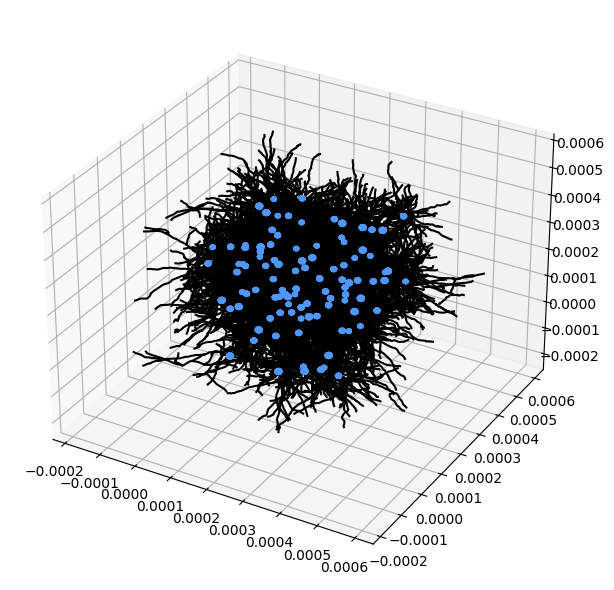

Plotting networks/bending_example/original-network-neuron-positions.hdf5


In [8]:
from snudda.plotting import PlotNetwork
pn = PlotNetwork(original_network_file)
pn.plot(plot_axon=False, plot_dendrite=True, plot_synapses=False)
pn.close() 
print(f"Plotting {original_network_file}")

Reading SNUDDA_DATA=None from networks/bending_example/network-config.json


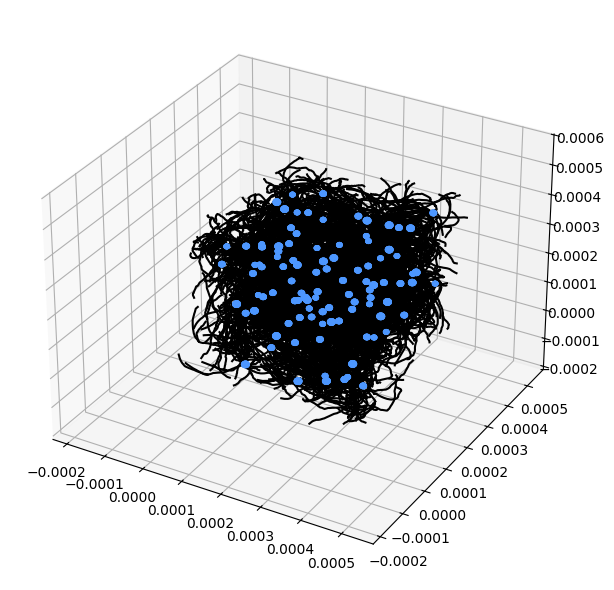

Plotting networks/bending_example/bend-network-neuron-positions.hdf5


In [9]:
from snudda.plotting import PlotNetwork
pn = PlotNetwork(bend_network_file)
pn.plot(plot_axon=False, plot_dendrite=True, plot_synapses=False)
pn.close() 
print(f"Plotting {bend_network_file}")